In [533]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt
from math import *
import os 
import pickle 
from mpl_toolkits.mplot3d import Axes3D

In [532]:
def drawacylinder(r = 1, xc = 0, yc = 0, z = [0, 3]):
    # Cylinder
    x=np.linspace(-r, r, 100)
    z=np.linspace(z[0], z[1], 100)
    Xc, Zc=np.meshgrid(x, z)
    Yc = np.sqrt(r**2-Xc**2)

    # Draw parameters
    rstride = 10
    cstride = 10
    ax.plot_surface(Xc+xc, Yc+yc, Zc, alpha=0.5, rstride=rstride, cstride=cstride, color = 'blue')
    ax.plot_surface(Xc+xc, -Yc+yc, Zc, alpha=0.5, rstride=rstride, cstride=cstride, color = 'blue')

def pt2cylinder(pt = [0, 0, 0], c = [0, 0, 0], r = 1, plot = 'T'):
    d0 = np.linalg.norm(np.array(pt) - np.array(c))
    d1 = np.linalg.norm(np.array(pt[:-1]) -  np.array(c[:-1])) 
    l1 = (d1**2 -r**2)**0.5 
    theta = acos(l1/d1)+pi if acos(l1/d1) < 0 else acos(l1/d1)
    R1 = [[cos(theta), -sin(theta)], [sin(theta), cos(theta)]]
    R2 = [[cos(-theta), -sin(-theta)], [sin(-theta), cos(-theta)]]
    v1 = np.dot([c[0] - pt[0], c[1] - pt[1]], R1)/d1*l1
    v2 = np.dot([c[0] - pt[0], c[1] - pt[1]], R2)/d1*l1
    pt1 = [pt[0]+v1[0], pt[1]+v1[1], c[2]]
    pt2 = [pt[0]+v2[0], pt[1]+v2[1], c[2]]
    if plot == 'T':
        ax.scatter([pt1[0], pt2[0]],[pt1[1], pt2[1]], [pt1[2], pt2[2]])
        ax.plot([pt[0], pt1[0]], [pt[1], pt1[1]], [pt[2], pt1[2]])
        ax.plot([pt[0], pt2[0]], [pt[1], pt2[1]], [pt[2], pt2[2]])
    return pt1, pt2

'''def plotptcylinder(pt1 = [0, 0, 1.3], pt2 = [0, 0, 1.6], c = [0, 0, 0], treeheight = [0, 3],  r = 1):
    pt2cylinder(pt1, c, r, plot = 'T')
    pt2cylinder(pt2, c, r, plot = 'T')
    drawacylinder(r, c[0], c[1], treeheight)
    '''
def plotptcylinder(pt1 = [0, 0, 1.3], pt2 = [0, 0, 1.6], c = [0, 0, 0], treeheight = [0, 3],  r = 1):
    d0 = np.linalg.norm(np.array(pt1) - np.array(c))
    d1 = np.linalg.norm(np.array(pt1[:-1]) -  np.array(c[:-1])) 
    l1 = (d1**2 -r**2)**0.5 
    theta = acos(l1/d1)+pi if acos(l1/d1) < 0 else acos(l1/d1)
    R1 = [[cos(theta), -sin(theta)], [sin(theta), cos(theta)]]
    R2 = [[cos(-theta), -sin(-theta)], [sin(-theta), cos(-theta)]]
    v1 = np.dot([c[0] - pt1[0], c[1] - pt1[1]], R1)/d1*l1
    v2 = np.dot([c[0] - pt1[0], c[1] - pt1[1]], R2)/d1*l1
    pt11 = [pt1[0]+v1[0], pt1[1]+v1[1], c[2]]
    pt21 = [pt1[0]+v2[0], pt1[1]+v2[1], c[2]]
    ax.scatter([pt11[0], pt21[0]],[pt11[1], pt21[1]], [pt11[2], pt21[2]])
    ax.plot([pt1[0], pt11[0]], [pt1[1], pt11[1]], [pt1[2], pt11[2]])
    ax.plot([pt1[0], pt21[0]], [pt1[1], pt21[1]], [pt1[2], pt21[2]])
    
    d0 = np.linalg.norm(np.array(pt2) - np.array(c))
    d1 = np.linalg.norm(np.array(pt2[:-1]) -  np.array(c[:-1])) 
    l1 = (d1**2 -r**2)**0.5 
    theta = acos(l1/d1)+pi if acos(l1/d1) < 0 else acos(l1/d1)
    R1 = [[cos(theta), -sin(theta)], [sin(theta), cos(theta)]]
    R2 = [[cos(-theta), -sin(-theta)], [sin(-theta), cos(-theta)]]
    v1 = np.dot([c[0] - pt2[0], c[1] - pt2[1]], R1)/d1*l1
    v2 = np.dot([c[0] - pt2[0], c[1] - pt2[1]], R2)/d1*l1
    pt12 = [pt2[0]+v1[0], pt2[1]+v1[1], c[2]]
    pt22 = [pt2[0]+v2[0], pt2[1]+v2[1], c[2]]
    ax.scatter([pt12[0], pt22[0]],[pt12[1], pt22[1]], [pt12[2], pt22[2]])
    ax.plot([pt2[0], pt12[0]], [pt2[1], pt12[1]], [pt2[2], pt12[2]])
    ax.plot([pt2[0], pt22[0]], [pt2[1], pt22[1]], [pt2[2], pt22[2]])
    
    
    # Cylinder
    x=np.linspace(-r, r, 100)
    z=np.linspace(treeheight[0], treeheight[1], 100)
    Xc, Zc=np.meshgrid(x, z)
    Yc = np.sqrt(r**2-Xc**2)
    # Draw parameters
    rstride = 10
    cstride = 10
    ax.plot_surface(Xc+c[0], Yc+c[1], Zc, alpha=0.5, rstride=rstride, cstride=cstride, color = 'blue')
    ax.plot_surface(Xc+c[0], -Yc+c[1], Zc, alpha=0.5, rstride=rstride, cstride=cstride, color = 'blue')
    

* ax.scatter(x[1000:4000],y[1000:4000],z[1000:4000],c='r') #繪點
* ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow') #繪面
* ax.plot(x,y,z,label=' ') #繪線

In [511]:
# fake data
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')


ax.scatter([0, 0], [0, 0], [1.3, 1.6], c='red', s = 10) 


plotptcylinder(pt1 = [0, 0, 1.3], pt2 = [0, 0, 1.6], c = [3, 3, 1.3], treeheight = [0, 3],  r = 0.5)


ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_zlim(0, 6)
#ax.view_init(elev=2, azim=45)

(0, 6)

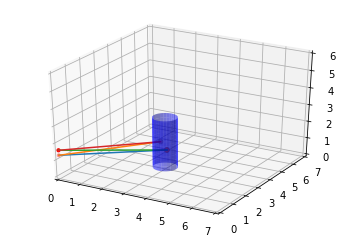

In [512]:
plt.show()

In [523]:
def field_data_simulation_transform(site_csv, tree_csv):
    hh, rr = [], []
    site_data, tree_data, slope = [], [], []
    with open(site_csv, 'r') as f1:
        for i in csv.reader(f1):
            site_data.append(i)
    with open(tree_csv, 'r') as f2:
        for i in csv.reader(f2):
            tree_data.append(i)
    slope = [site_data[i][1] for i in range(7, 15)]
    del tree_data[0]
    raw_caliper = [float(tree_data[i][1]) for i in range(len(tree_data))] 
    raw_az = [float(tree_data[i][3]) for i in range(len(tree_data))] 
    raw_dist = [float(tree_data[i][4]) for i in range(len(tree_data))] 
    #raw_d2 = [float(tree_data[i][7]) for i in range(len(tree_data))] 
    #raw_d3= [float(tree_data[i][8]) for i in range(len(tree_data))] 
    for i in range(len(tree_data)):
        ptone, pttwo = [0, 0, 1.3], [0, 0, 1.6]
        distance = raw_dist[i] + (raw_caliper[i]/200)
        h = [cos((raw_az[i]/360)*2*pi)*distance, sin((raw_az[i]/360)*2*pi)*distance, 1.3]
        hh.append(h)
        rr.append(raw_caliper[i]/200)
    return hh, rr


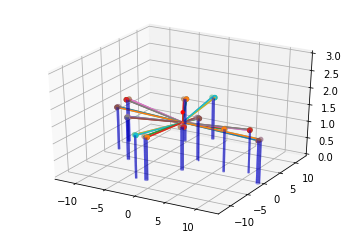

In [524]:
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')


ax.scatter([0, 0], [0, 0], [1.3, 1.6], c='red', s = 10) 
hh, rr = field_data_simulation_transform('/Users/pengbohao/Downloads/data/csv data/Field Data NTUEF HeShe Site1.2 170324/Site-表格 1.csv', '/Users/pengbohao/Downloads/data/csv data/Field Data NTUEF HeShe Site1.2 170324/Tree-表格 1.csv')

for i in range(len(hh)):
    plotptcylinder(pt1 = [0, 0, 1.3], pt2 = [0, 0, 1.3], c = hh[i], treeheight = [0, 1.3],  r = rr[i])

ax.set_xlim(-13, 13)
ax.set_ylim(-13, 13)
ax.set_zlim(0, 3)
#ax.view_init(elev=2, azim=45)
plt.show()